In [73]:
%matplotlib inline

In [74]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, RocCurveDisplay

In [75]:
df = pd.read_csv('./datasets/adult.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [76]:
selected_features = df.drop('income', axis=1).columns
print(selected_features)

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')


In [77]:
le = LabelEncoder()
for i in selected_features:
  df[i] = le.fit_transform(df[i])
df['income'] = le.fit_transform(df['income'])
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,8,4,19329,1,6,4,7,3,2,1,0,0,39,39,0
1,21,4,4212,11,8,2,5,0,4,1,0,0,49,39,0
2,11,2,25340,7,11,2,11,0,4,1,0,0,39,39,1
3,27,4,11201,15,9,2,7,0,2,1,98,0,39,39,1
4,1,0,5411,15,9,4,0,3,4,0,0,0,29,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,10,4,21582,7,11,2,13,5,4,0,0,0,37,39,0
48838,23,4,10584,11,8,2,7,0,4,1,0,0,39,39,1
48839,41,4,10316,11,8,6,1,4,4,0,0,0,39,39,0
48840,5,4,16813,11,8,4,1,3,4,1,0,0,19,39,0


In [78]:
X = np.array(df.drop('income', axis=1))
X

array([[    8,     4, 19329, ...,     0,    39,    39],
       [   21,     4,  4212, ...,     0,    49,    39],
       [   11,     2, 25340, ...,     0,    39,    39],
       ...,
       [   41,     4, 10316, ...,     0,    39,    39],
       [    5,     4, 16813, ...,     0,    19,    39],
       [   35,     5, 23321, ...,     0,    39,    39]], dtype=int64)

In [79]:
y = le.fit_transform(np.array(df['income']))
y

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

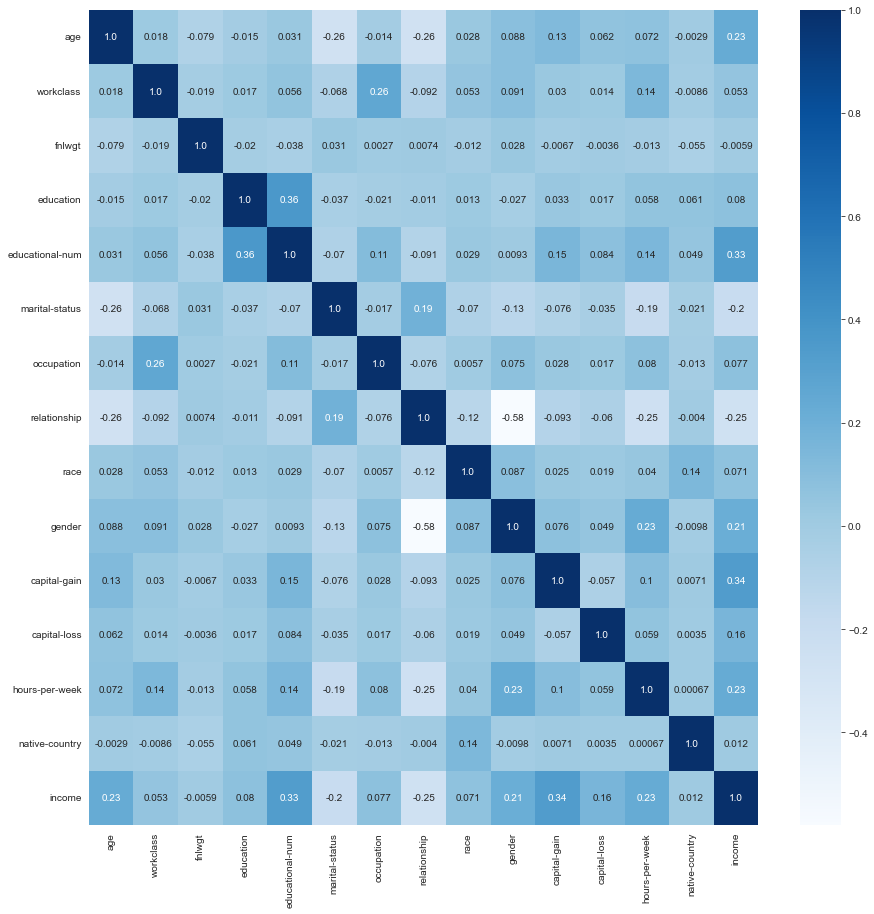

In [80]:
correlation_matrix = df.corr()
fig = plt.figure(figsize=(15,15))
fig.set_facecolor('white')
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2")
plt.show()

<Figure size 1440x1440 with 0 Axes>

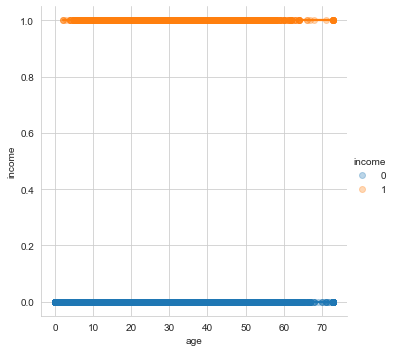

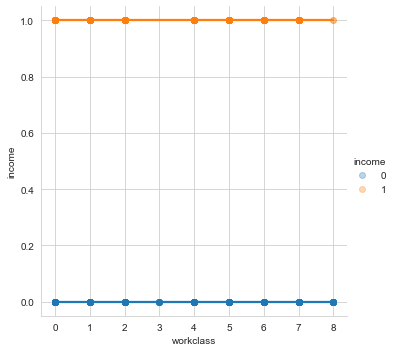

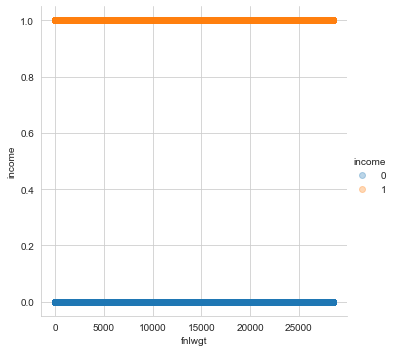

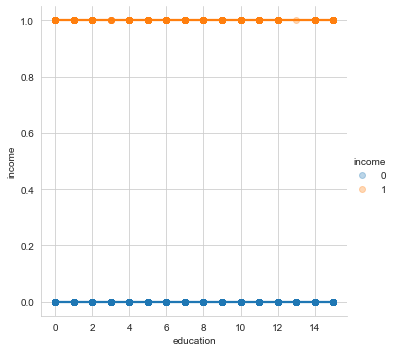

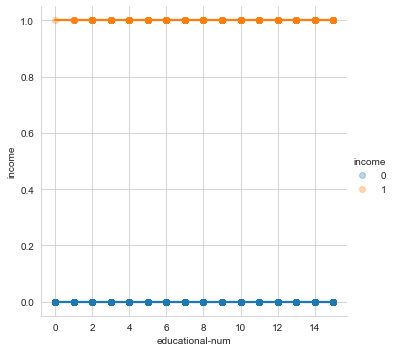

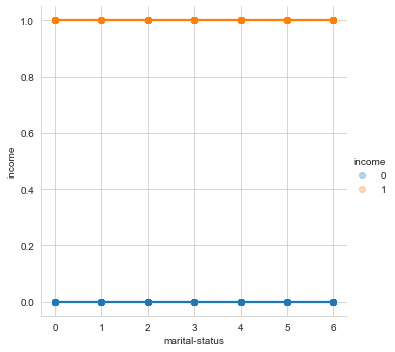

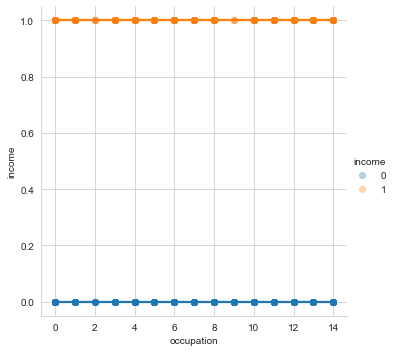

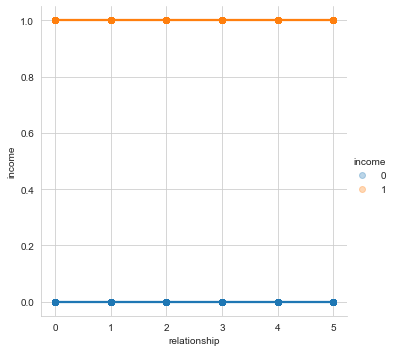

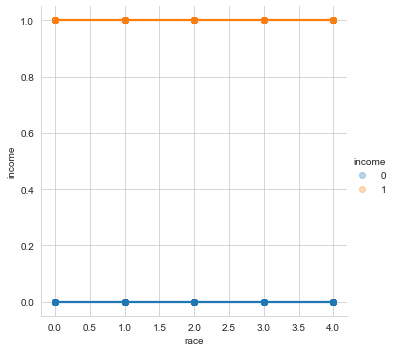

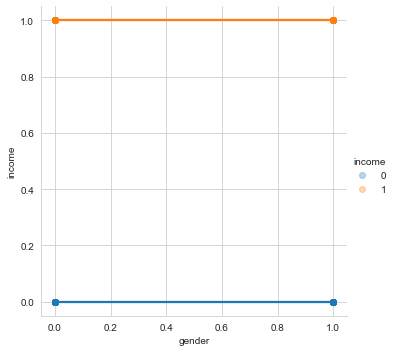

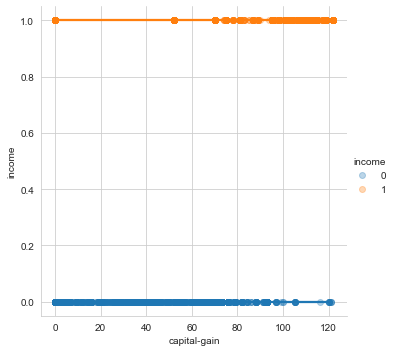

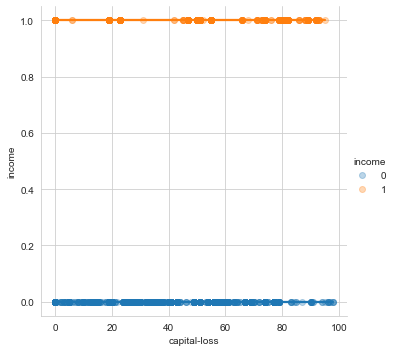

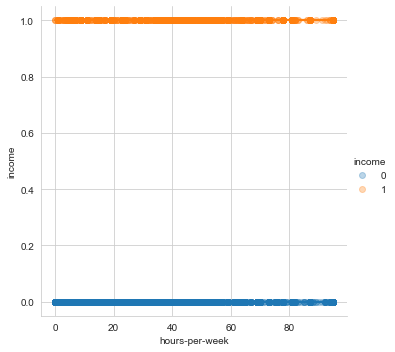

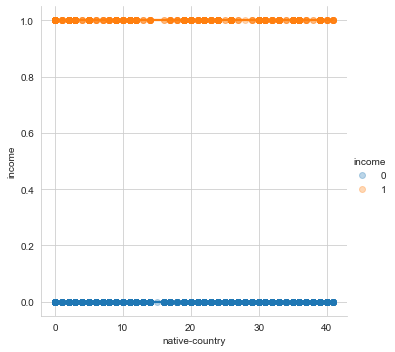

In [81]:
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(20)
fig.set_facecolor("white")
sns.set_style('whitegrid')

for feature in selected_features:
  sns.lmplot(x=feature, y='income', data=df, hue='income', scatter_kws={'alpha': 0.3})
  plt.show()

In [82]:
steps = [
  ('scaling', StandardScaler()),
  ('knn', KNeighborsClassifier())
]

param_grid = {
  'knn__n_neighbors': [3,4,5,6,7,8],
  'knn__weights': ['uniform', 'distance']
}

In [83]:
pipeline = Pipeline(steps)
model = GridSearchCV(pipeline, param_grid=param_grid)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
model.fit(X_train, y_train)

c:\Users\kartik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

c:\Users\kartik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accept

GridSearchCV(estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 4, 5, 6, 7, 8],
                         'knn__weights': ['uniform', 'distance']})

In [86]:
model.score(X_train, y_train)

c:\Users\kartik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



0.8715737209837996

In [87]:
model.score(X_test, y_test)

c:\Users\kartik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



0.8499334629951889

In [88]:
predicted_y = model.predict(X)

c:\Users\kartik\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [89]:
cf_matrix = confusion_matrix(y, predicted_y)
cf_matrix

array([[35204,  1951],
       [ 4533,  7154]], dtype=int64)

[Text(0, 0.5, '<=50K'), Text(0, 1.5, '>50K')]

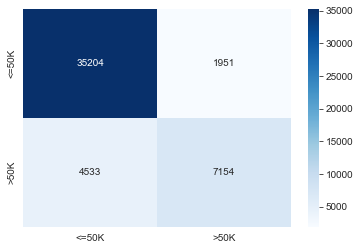

In [90]:
heatmap = sns.heatmap(cf_matrix, cmap="Blues", annot=True, fmt='')
heatmap.xaxis.set_ticklabels(['<=50K', '>50K'])
heatmap.yaxis.set_ticklabels(['<=50K', '>50K'])

In [91]:
precision_score(y, predicted_y)

0.785722130697419

In [92]:
recall_score(y, predicted_y)

0.6121331393856422

In [93]:
f1_score(y, predicted_y)

0.6881492881877646

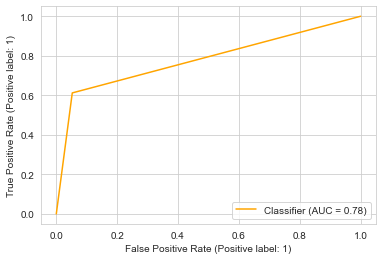

In [95]:
RocCurveDisplay.from_predictions(y, predicted_y, color='orange')